In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

import warnings
warnings.filterwarnings('ignore')

In [2]:
Rating=pd.read_csv('Ratings.csv')
Movie_D=pd.read_csv('Movie details.csv',encoding='latin-1')
User_Info=pd.read_csv('user level info.csv',encoding='latin-1')

In [3]:
print("Shape of Rating: ",Rating.shape)
print("Shape of Movie Details: ",Movie_D.shape)
print("Shape of User Info: ",User_Info.shape)

Shape of Rating:  (100000, 4)
Shape of Movie Details:  (1682, 24)
Shape of User Info:  (943, 5)


In [4]:
Rating.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#rename the column names
Rating.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

In [6]:
Movie_D.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
Movie_D.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date ',
       'IMDb_URL', 'unknown', 'Action ', 'Adventure', 'Animation',
       'Childrens', 'Comedy ', 'Crime ', ' Documentary ', 'Drama',
       ' Fantasy', 'Film-Noir ', 'Horror ', 'Musical', 'Mystery',
       ' Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [8]:
Movie_Rating=pd.merge(Rating,Movie_D,on='movie_id')
Movie_Rating.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Movie_Rating['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [10]:
Movie_Rating.groupby('movie_title')['rating'].mean().sort_values(ascending=False)[:10]

movie_title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [11]:
Movie_Rating.groupby('movie_title')['rating'].count().sort_values(ascending=False)[:10]

movie_title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [12]:
# Calculate mean rating of all movies 
Movie_Stats = pd.DataFrame(Movie_Rating.groupby('movie_title')['rating'].mean())
Movie_Stats.sort_values(by = ['rating'],ascending=False).head()

,rating
movie_title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [13]:
Movie_Stats['Count_of_ratings'] = pd.DataFrame(Movie_Rating.groupby('movie_title')['rating'].count())
Movie_Stats.sort_values(by =['Count_of_ratings'], ascending=False).head()

,rating,Count_of_ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


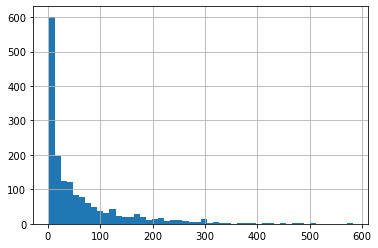

In [14]:
Movie_Rating.groupby('movie_title')['rating'].count().sort_values(ascending=False).hist(bins=50)

 you can see that most of the movies have received less than 50 ratings. It is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data

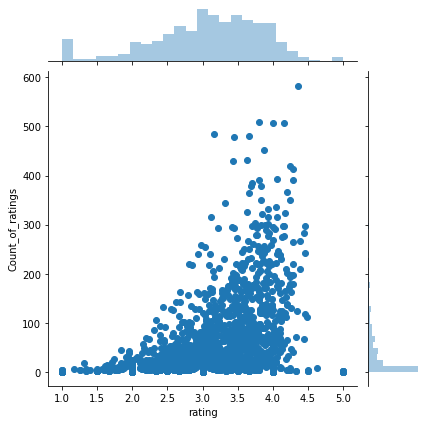

In [15]:
sns.jointplot(x='rating', y='Count_of_ratings', data=Movie_Stats)

In [16]:
User_movie_Rating = Movie_Rating.pivot_table(index='user_id', columns='movie_title', values='rating')
User_movie_Rating.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [17]:
##We can achieve this by computing the correlation between these two movies ratings and the ratings of the rest of the movies in the dataset. 
##The first step is to create a dataframe with the ratings of these movies 

# Example pick up one movie related rating  
User_movie_Rating['Air Force One (1997)'][:20]

user_id
1     NaN
2     4.0
3     2.0
4     5.0
5     NaN
6     NaN
7     4.0
8     NaN
9     NaN
10    NaN
11    3.0
12    4.0
13    1.0
14    NaN
15    4.0
16    5.0
17    NaN
18    NaN
19    NaN
20    NaN
Name: Air Force One (1997), dtype: float64

In [18]:
#Correlation Similarity
#We can find the correlation between the user ratings for the given movie and 
#all the other movies using corrwith() function as shown below

Similarity = User_movie_Rating.corrwith(User_movie_Rating['101 Dalmatians (1996)'])
Similarity.head()

movie_title
'Til There Was You (1997)   -1.000000
1-900 (1994)                      NaN
101 Dalmatians (1996)        1.000000
12 Angry Men (1957)         -0.049890
187 (1997)                   0.269191
dtype: float64

In [19]:
corr_similar = pd.DataFrame(Similarity, columns=['Correlation'])
corr_similar.sort_values(['Correlation'], ascending= False).head(10)

,Correlation
movie_title,
Hard Rain (1998),1.0
In the Line of Duty 2 (1987),1.0
Frisk (1995),1.0
101 Dalmatians (1996),1.0
Grateful Dead (1995),1.0
House Party 3 (1994),1.0
"Winter Guest, The (1997)",1.0
April Fool's Day (1986),1.0
Loch Ness (1995),1.0


In [20]:
#We will add the count of rating also to see why many movies are exactly correlating for the single movie

corr_similar_num_of_rating = corr_similar.join(Movie_Stats['Count_of_ratings'])
corr_similar_num_of_rating.sort_values(['Correlation'], ascending= False).head(10)

,Correlation,Count_of_ratings
movie_title,,
Hard Rain (1998),1.0,31
In the Line of Duty 2 (1987),1.0,4
Frisk (1995),1.0,3
101 Dalmatians (1996),1.0,109
Grateful Dead (1995),1.0,4
House Party 3 (1994),1.0,9
"Winter Guest, The (1997)",1.0,9
April Fool's Day (1986),1.0,15
Loch Ness (1995),1.0,4


In [21]:
#we need to filter movies correlated to given movie that have more than 30/50 ratings

corr_similar_num_of_rating[corr_similar_num_of_rating ['Count_of_ratings']>50].sort_values('Correlation', ascending=False)[:10]

,Correlation,Count_of_ratings
movie_title,,
101 Dalmatians (1996),1.000000,109
"Apostle, The (1997)",1.000000,55
"Wings of the Dove, The (1997)",0.880705,75
"Man Who Knew Too Little, The (1997)",0.866025,52
McHale's Navy (1997),0.739510,69
Flubber (1997),0.735294,53
Miller's Crossing (1990),0.714147,89
Kalifornia (1993),0.713074,59
She's So Lovely (1997),0.686406,53


In [22]:
def get_recommendations(title):
    # Get the movie ratings of the movie that matches the title
    Movie_rating = User_movie_Rating[title]

    # Get the  similarity corrilated  scores of all movies with that movie
    sim_scores = User_movie_Rating.corrwith(Movie_rating)

    # Sort the movies based on the similarity scores
    corr_title = pd.DataFrame(sim_scores, columns=['Correlation'])
    
    # Removing na values 
    corr_title.dropna(inplace=True)
    
    corr_title = corr_title.join(Movie_Stats['Count_of_ratings'])
    
    # Return the top 10 most similar movies
    return corr_title[corr_title ['Count_of_ratings']>50].sort_values('Correlation', ascending=False).head()

In [23]:
# Usage of the above function
get_recommendations('Addicted to Love (1997)')

,Correlation,Count_of_ratings
movie_title,,
Addicted to Love (1997),1.0,54
"Amityville Horror, The (1979)",1.0,53
Giant (1956),1.0,51
Flubber (1997),1.0,53
Last Action Hero (1993),1.0,59


In [24]:
get_recommendations('Star Wars (1977)')

,Correlation,Count_of_ratings
movie_title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51


In [25]:
#Cosine Similarity

Movie_Rating.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
User_movie_Rating.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [27]:
#A matrix is a two-dimensional data object made of m rows and n columns, therefore having total m x n values.
#If most of the elements of the matrix have 0 value, then it is called a sparse matrix

Movie_cosine=Movie_Rating[['user_id','movie_id','rating']]
Movie_cosine.head()

,user_id,movie_id,rating
0,196,242,3
1,63,242,3
2,226,242,5
3,154,242,3
4,306,242,5


In [28]:
from scipy import sparse #to create sparse matrix

data=Movie_cosine.rating
row=Movie_cosine.user_id
column=Movie_cosine .movie_id

R=sparse.coo_matrix((data,(row,column))).tocsr() #Convert this matrix to Compressed Sparse Row format
R.shape

(944, 1683)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

find_similarity=cosine_similarity(R.T) #Transposing Sparse Matrix

print(find_similarity.shape)

(1683, 1683)


In [30]:
find_similarity 

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.40238218, ..., 0.        , 0.04718307,
        0.04718307],
       [0.        , 0.40238218, 1.        , ..., 0.        , 0.07829936,
        0.07829936],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.04718307, 0.07829936, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.04718307, 0.07829936, ..., 0.        , 0.        ,
        1.        ]])

In [31]:
def Get_Top5_SimilarMovies(model,movie_id,n=5):
    return model[movie_id].argsort()[::-1][:n].tolist()

In [32]:
Movie_D.iloc[8]

movie_id                                                               9
movie_title                                      Dead Man Walking (1995)
release_date                                                    1-Jan-95
video_release_date                                                   NaN
IMDb_URL               http://us.imdb.com/M/title-exact?Dead%20Man%20...
unknown                                                                0
Action                                                                 0
Adventure                                                              0
Animation                                                              0
Childrens                                                              0
Comedy                                                                 0
Crime                                                                  0
 Documentary                                                           0
Drama                                              

In [33]:
Movie_D.iloc[Get_Top5_SimilarMovies(find_similarity,8)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8,9,Dead Man Walking (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,205,Patton (1970),1-Jan-70,NaN,http://us.imdb.com/M/title-exact?Patton%20(1970),0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
174,175,Brazil (1985),1-Jan-85,NaN,http://us.imdb.com/M/title-exact?Brazil%20(1985),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
423,424,Children of the Corn: The Gathering (1996),1-Jan-96,NaN,http://us.imdb.com/M/title-exact?Children%20of...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
172,173,"Princess Bride, The (1987)",1-Jan-87,NaN,http://us.imdb.com/M/title-exact?Princess%20Br...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
#Matrix Factorisation

#fill NaN with zeros
df_matrix=User_movie_Rating.fillna(0)

#Normalise the values
Normalised_values=df_matrix.values - np.mean(df_matrix.values,axis=1).reshape(-1,1)
Normalised_values

array([[-0.58713942, -0.58713942,  1.41286058, ..., -0.58713942,
         3.41286058, -0.58713942],
       [-0.13581731, -0.13581731, -0.13581731, ..., -0.13581731,
        -0.13581731, -0.13581731],
       [-0.08834135, -0.08834135, -0.08834135, ..., -0.08834135,
        -0.08834135, -0.08834135],
       ...,
       [-0.05348558, -0.05348558, -0.05348558, ..., -0.05348558,
        -0.05348558, -0.05348558],
       [-0.19951923, -0.19951923, -0.19951923, ..., -0.19951923,
        -0.19951923, -0.19951923],
       [-0.34435096, -0.34435096, -0.34435096, ..., -0.34435096,
        -0.34435096, -0.34435096]])

In [35]:
#Create the matrix U,SIGMA and VT

from scipy.sparse.linalg import svds #svd algorithm (Single value decomposition)
U,SIGMA,VT=svds(Normalised_values)
U.shape, SIGMA.shape, VT.shape

((943, 6), (6,), (6, 1664))

In [36]:
SIGMA=np.diag(SIGMA)
SIGMA.shape

(6, 6)

In [37]:
reconstructed_df=np.dot(np.dot(U,SIGMA),VT) + np.mean(df_matrix.values,axis=1).reshape(-1,1)
predictions_df=pd.DataFrame(reconstructed_df,columns=df_matrix.columns)

In [38]:
predictions_df

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
0,-0.008376,0.040828,0.255097,1.368637,0.086250,1.412191,0.490817,3.157662,-0.027797,0.324986,...,-0.028977,-0.003432,-0.017040,2.536312,1.662737,0.666667,0.670269,-0.049776,0.129188,-0.005724
1,0.038789,-0.044555,0.326952,0.133404,0.342076,0.530822,-0.318530,-0.024044,-0.020123,-0.082302,...,-0.040017,0.011209,-0.040759,-0.255696,-0.368808,-0.202552,0.224910,-0.004341,-0.026679,-0.021383
2,0.051939,0.008640,-0.154229,0.001675,0.373526,0.077553,-0.027438,0.008863,0.028092,-0.041838,...,0.014913,0.061333,0.014861,-0.246739,0.130785,0.059758,0.094154,-0.002092,0.058520,0.020152
3,0.016714,-0.009719,-0.007841,0.027480,0.235820,0.077210,0.039097,0.119632,0.002121,0.006895,...,-0.006565,0.021345,-0.004972,-0.104974,0.088231,0.028096,0.038567,-0.010205,0.026276,-0.005262
4,0.039749,0.064445,0.482236,0.667350,-0.026506,0.372200,0.780897,1.681404,0.040625,0.334868,...,0.051029,0.034790,0.060711,1.524330,1.131505,0.499319,0.068121,0.048664,0.122230,0.039145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.083825,0.044658,0.890777,-0.067300,0.063291,0.570157,-0.053807,-0.201385,0.053015,-0.032163,...,0.051459,0.033485,0.055030,-0.108906,-0.289406,-0.090555,0.121643,0.123169,0.036787,0.051956
939,-0.058048,-0.112387,-0.013576,0.833322,0.261657,0.285703,0.232680,1.499292,-0.103425,0.265434,...,-0.120755,-0.050606,-0.118088,0.955678,0.388930,0.037473,0.120068,-0.132451,-0.061100,-0.106984
940,-0.010622,0.004351,0.260678,-0.050851,0.054871,0.392288,-0.076841,0.119739,-0.007395,-0.017161,...,-0.010433,-0.017168,-0.005956,-0.076929,-0.072433,-0.028418,0.133792,0.016454,0.013280,-0.007971
941,0.027775,-0.033540,0.377408,1.152540,0.215431,-0.353335,0.787068,1.671002,0.000257,0.843971,...,-0.014833,0.040406,-0.011787,1.080770,-0.082427,-0.150538,-0.213645,0.002248,-0.038581,-0.022076


In [57]:
#Recommending movies to user

#We select movies which are not rated by the user.
#We merge the resultant (non rated) movies dataframe with the predictions_df matrix on the movie title.
#Now we have the predicted values for the movie ratings.
#We select the movies with the highest predicted ratings, and recommend that to the user.

def get_recommendations(user_id, number_of_recommendations):
    df = Movie_D[~Movie_D['movie_id'].isin(Movie_Rating[Movie_Rating['user_id'] == user_id] \
                                        .sort_values(['rating'], ascending=False)['movie_id'])] \
                                        .merge(pd.DataFrame(predictions_df.iloc[user_id - 1] \
                                                            .sort_values(ascending=False)) \
                                               .reset_index(), \
                                               how='left', left_on='movie_title', right_on='movie_title') \
                                        .sort_values(user_id - 1, ascending=False) \
                                        .iloc[:number_of_recommendations, :]
    
    df=df[['movie_id','movie_title']]
    return df                                                                                            

In [58]:
get_recommendations(100,10)

,movie_id,movie_title
292,307,"Devil's Advocate, The (1997)"
287,301,In & Out (1997)
711,748,"Saint, The (1997)"
309,332,Kiss the Girls (1997)
305,327,Cop Land (1997)
244,245,"Devil's Own, The (1997)"
245,246,Chasing Amy (1997)
302,322,Murder at 1600 (1997)
308,331,"Edge, The (1997)"
288,303,Ulee's Gold (1997)
